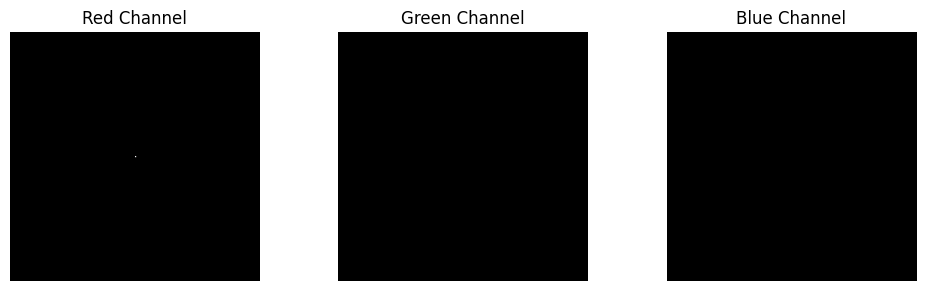

In [1]:
# a) Create an RGB Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the dimensions of the image
width, height = 200, 200

# Create an empty black image with 3 channels (RGB)
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Set the color of a specific pixel
rgb_image[100, 100] = (0, 0, 255)  # Red pixel

# Save the image to a file
cv2.imwrite('rgb_image.png', rgb_image)

# Loading RGB image
image_path = 'rgb_image.png'
image = cv2.imread(image_path)

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Create subplots to display the channels
plt.figure(figsize=(10, 3))

# Red channel
plt.subplot(131)
plt.imshow(cv2.merge([r, r, r]))
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(132)
plt.imshow(cv2.merge([g, g, g]))
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(133)
plt.imshow(cv2.merge([b, b, b]))
plt.title('Blue Channel')
plt.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()



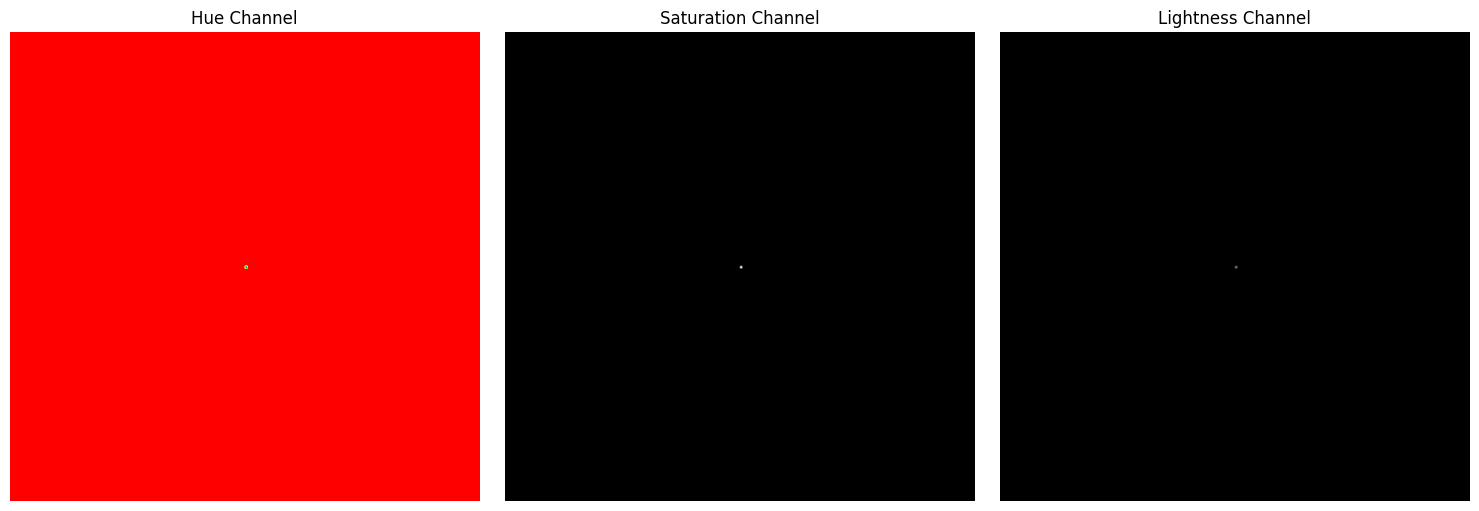

True

In [2]:
#b) Separating into 3 channels of HSL color space

# Load RGB image
image_path = 'rgb_image.png'
rgb_image = cv2.imread(image_path)

# Convert RGB image to HSL
def rgb_to_hsl(rgb):
    r, g, b = rgb / 255.0
    c_max = max(r, g, b)
    c_min = min(r, g, b)
    delta = c_max - c_min

    if delta == 0:
        h = 0
    elif c_max == r:
        h = 60 * ((g - b) / delta) % 360
    elif c_max == g:
        h = 60 * ((b - r) / delta) + 120
    else:
        h = 60 * ((r - g) / delta) + 240

    l = (c_max + c_min) / 2

    if delta == 0:
        s = 0
    else:
        s = delta / (1 - abs(2 * l - 1))

    h = (h / 360) * 100
    s = s * 100
    l = l * 100

    return h, s, l

# Separate H, S, and L channels
hsl_image = np.apply_along_axis(rgb_to_hsl, 2, rgb_image)

# Extract the H, S, and L channels
h_channel, s_channel, l_channel = cv2.split(hsl_image)

# Create subplots to display the channels
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Hue channel
plt.subplot(131)
plt.imshow(h_channel, cmap='hsv', vmin=0, vmax=100)
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(132)
plt.imshow(s_channel, cmap='gray', vmin=0, vmax=100)
plt.title('Saturation Channel')
plt.axis('off')

# Lightness channel
plt.subplot(133)
plt.imshow(l_channel, cmap='gray', vmin=0, vmax=100)
plt.title('Lightness Channel')
plt.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

#Save the HSL images
cv2.imwrite('h_channel.png', h_channel)
cv2.imwrite('s_channel.png', s_channel)
cv2.imwrite('l_channel.png', l_channel)


In [3]:
#HSL to RGB

# Load H, S, and L channels
h_channel = cv2.imread('h_channel.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)  # Load H channel
s_channel = cv2.imread('s_channel.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)  # Load S channel
l_channel = cv2.imread('l_channel.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)  # Load L channel

# Convert H, S, and L channels back to the range [0, 1]
h_channel /= 100.0
s_channel /= 100.0
l_channel /= 100.0

# Reconstruct the RGB image
def hsl_to_rgb(h, s, l):
    if s == 0:
        r, g, b = l, l, l
    else:
        if l < 0.5:
            q = l * (1 + s)
        else:
            q = l + s - (l * s)

        p = 2 * l - q

        r = hue_to_rgb(p, q, h + 1/3)
        g = hue_to_rgb(p, q, h)
        b = hue_to_rgb(p, q, h - 1/3)

    return (b * 255).astype(np.uint8), (g * 255).astype(np.uint8), (r * 255).astype(np.uint8)

def hue_to_rgb(p, q, t):
    if t < 0:
        t += 1
    if t > 1:
        t -= 1
    if t < 1/6:
        return (p + (q - p) * 6 * t).astype(np.uint8)
    if t < 1/2:
        return (q * 255).astype(np.uint8)
    if t < 2/3:
        return (p + (q - p) * (2/3 - t) * 6).astype(np.uint8)
    return (p * 255).astype(np.uint8)

# Create an empty RGB image
height, width = h_channel.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Reconstruct RGB image from H, S, and L channels
for y in range(height):
    for x in range(width):
        h = h_channel[y, x]
        s = s_channel[y, x]
        l = l_channel[y, x]
        r, g, b = hsl_to_rgb(h, s, l)
        rgb_image[y, x] = (b, g, r)

# Save the RGB Image
cv2.imwrite('reconstructed_rgb_image.png', rgb_image)




True

In [7]:
#Equalisation algorithm for Greyscale image

import cv2
import numpy as np

# Load a grayscale image
image_path = 'Hibiscus.png'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram of the grayscale image
hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF to the range [0, 255]
cdf_normalized = (cdf * 255 / cdf[-1]).astype(np.uint8)

# Apply the equalization to the image using the CDF
equalized_image = cdf_normalized[gray_image]


# Save the equalized image
cv2.imwrite('greyscale_equalized_image.png', equalized_image)



True

In [18]:
#Equalised RGB image
from PIL import Image

def histogram_equalization(channel):
    # Calculate the histogram of the image
    histogram, _ = np.histogram(channel, bins=256, range=(0, 256))

    # Calculate the cumulative distribution function (Computing the cumulative histogram)
    cdf = histogram.cumsum()

    # Perform histogram equalization
    equalized_pixels = np.uint8(cdf / (width * height) * 255)

    return Image.fromarray(equalized_pixels[channel])


# Load RGB image
image_path = 'Hibiscuscolor.png'
rgb_image = cv2.imread(image_path)

# Separate the image into R, G, and B channels
b, g, r = cv2.split(rgb_image)

# Apply histogram equalization to each channel
equalized_r = histogram_equalization(r)
equalized_g = histogram_equalization(g)
equalized_b = histogram_equalization(b)

# Merge the equalized channels to reconstruct the image
equalized_rgb_image = Image.merge("RGB", (equalized_b, equalized_g, equalized_r))

# Save the equalized RGB image
equalized_rgb_image.save('equalized_rgb_image.png')




In [23]:
# Load RGB image
image_path = 'Hibiscuscolor.png'
rgb_image = cv2.imread(image_path)

# Convert the RGB image to HSL color space
hsl_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HLS)

# Split the HSL image into H, S, and L channels
h_channel, s_channel, l_channel = cv2.split(hsl_image)

# Apply histogram equalization to the L channel
equalized_l = cv2.equalizeHist(l_channel)

# Merge the equalized L channel with the original H and S channels
hsl_equalized_image = cv2.merge([h_channel, s_channel, equalized_l])

# Convert the HSL equalized image back to RGB
equalized_rgb_image = cv2.cvtColor(hsl_equalized_image, cv2.COLOR_HLS2BGR)

# Save the equalized RGB image
cv2.imwrite('equalized_hsl_image.png', equalized_rgb_image)



True